In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Profiling

In [2]:
df=pd.read_csv('Housing.csv')

In [3]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [4]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# DATA CLEANSING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Data sudah tidak memiliki nilai missing value, namun boleh jika dicek dan dihapus mengenai outlier. Namun pada kesempatan kali ini, outlier tidak dihilangkan.

# Exploratory Data Analysis

In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


tidak ada data anomali. karena tidak ada price yang negative

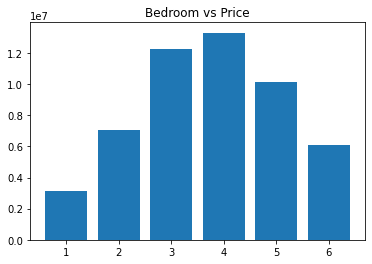

In [8]:
plt.bar(df["bedrooms"], df["price"])
plt.title("Bedroom vs Price")
plt.show()

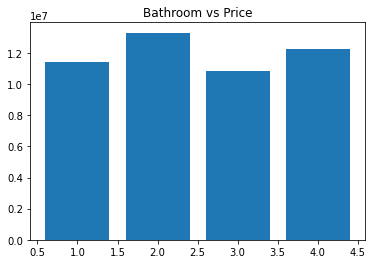

In [9]:
plt.bar(df["bathrooms"], df["price"])
plt.title("Bathroom vs Price")
plt.show()

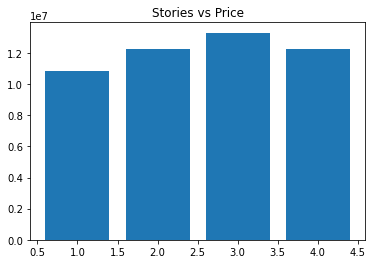

In [10]:
plt.bar(df["stories"], df["price"])
plt.title("Stories vs Price")
plt.show()

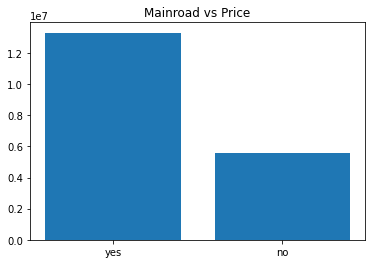

In [11]:
plt.bar(df["mainroad"], df["price"])
plt.title("Mainroad vs Price")
plt.show()

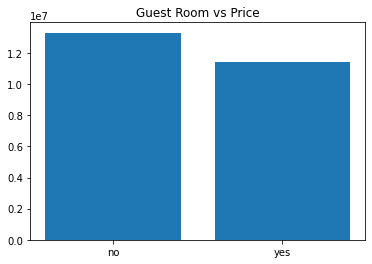

In [12]:
plt.bar(df["guestroom"], df["price"])
plt.title("Guest Room vs Price")
plt.show()

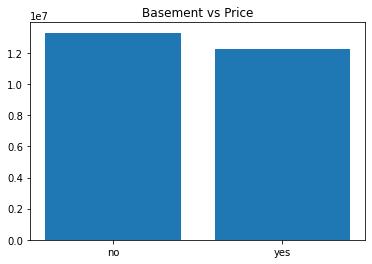

In [13]:
plt.bar(df["basement"], df["price"])
plt.title("Basement vs Price")
plt.show()

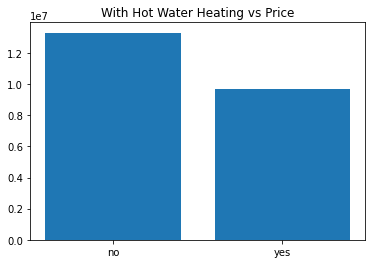

In [14]:
plt.bar(df["hotwaterheating"], df["price"])
plt.title("With Hot Water Heating vs Price")
plt.show()

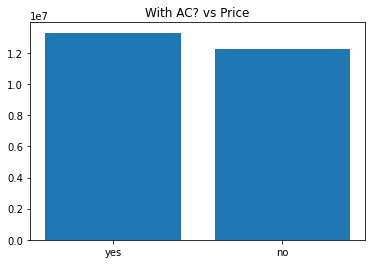

In [15]:
plt.bar(df["airconditioning"], df["price"])
plt.title("With AC? vs Price")
plt.show()

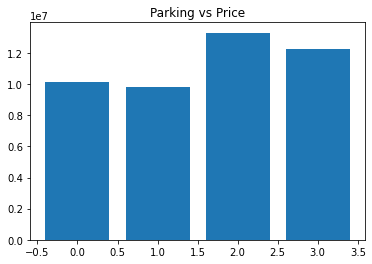

In [16]:
plt.bar(df["parking"], df["price"])
plt.title("Parking vs Price")
plt.show()

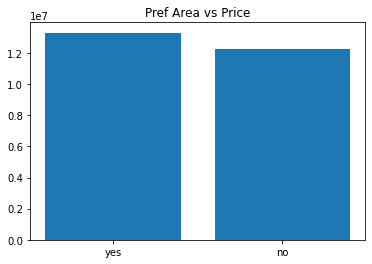

In [17]:
plt.bar(df["prefarea"], df["price"])
plt.title("Pref Area vs Price")
plt.show()

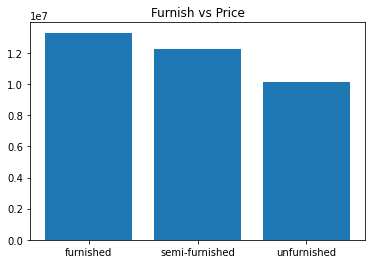

In [18]:
plt.bar(df["furnishingstatus"], df["price"])
plt.title("Furnish vs Price")
plt.show()

<AxesSubplot:>

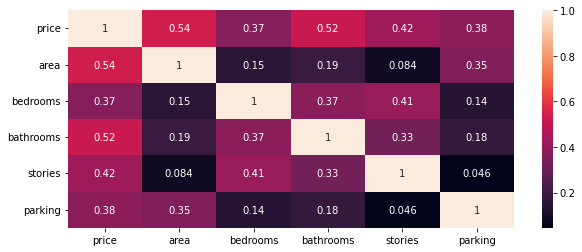

In [19]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot= True)

# FEATURE ENGINEER

disini area dan bathroom memiliki korelasi yang tinggi terhadap price, kita bisa drop area atau bathroom. namun karena disini area memiliki nilai paling tinggi. area yg di drop

In [20]:
df.drop(["area"], axis = 1, inplace=True)

beberapa column menggunakan Use One Hot Encode because categorical

In [21]:
mainroad_enc = pd.get_dummies(df["mainroad"], prefix = "mainroad", drop_first = False)
df = df.drop(["mainroad"], axis = 1)
df = pd.concat([df, mainroad_enc], axis=1)

In [22]:
guestroom_enc = pd.get_dummies(df["guestroom"], prefix = "guestroom", drop_first = False)
df = df.drop(["guestroom"], axis = 1)
df = pd.concat([df, guestroom_enc], axis=1)

In [23]:
basement_enc = pd.get_dummies(df["basement"], prefix = "basement", drop_first = False)
df = df.drop(["basement"], axis = 1)
df = pd.concat([df, basement_enc], axis=1)

In [24]:
hotwaterheating_enc = pd.get_dummies(df["hotwaterheating"], prefix = "hotwaterheating", drop_first = False)
df = df.drop(["hotwaterheating"], axis = 1)
df = pd.concat([df, hotwaterheating_enc], axis=1)

In [25]:
airconditioning_enc = pd.get_dummies(df["airconditioning"], prefix = "airconditioning", drop_first = False)
df = df.drop(["airconditioning"], axis = 1)
df = pd.concat([df, airconditioning_enc], axis=1)

In [26]:
prefarea_enc = pd.get_dummies(df["prefarea"], prefix = "prefarea", drop_first = False)
df = df.drop(["prefarea"], axis = 1)
df = pd.concat([df, prefarea_enc], axis=1)

Use mapping to furnishingstatus because ordinal 

In [27]:
df["furnishingstatus"] = df["furnishingstatus"].map({"furnished":0, "semi-furnished":1, "unfurnished":2}) 
df.head()

,price,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,4,2,3,2,0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,4,4,4,3,0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,3,2,2,2,1,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,4,2,2,3,0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,4,1,2,2,0,0,1,0,1,0,1,1,0,0,1,1,0


In [28]:
# df['area']=(df['area']-df['area'].min())/(df['area'].max()-df['area'].min())
# ^ manual

scaler = MinMaxScaler()
df['bedrooms'] = scaler.fit_transform(df[['bedrooms']])
df['bathrooms'] = scaler.fit_transform(df[['bathrooms']])
df['stories'] = scaler.fit_transform(df[['stories']])
df['parking'] = scaler.fit_transform(df[['parking']])
df['furnishingstatus'] = scaler.fit_transform(df[['furnishingstatus']])

In [29]:
df.head()

,price,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,0.6,0.333333,0.666667,0.666667,0.0,0,1,1,0,1,0,1,0,0,1,0,1
1,12250000,0.6,1.000000,1.000000,1.000000,0.0,0,1,1,0,1,0,1,0,0,1,1,0
2,12250000,0.4,0.333333,0.333333,0.666667,0.5,0,1,1,0,0,1,1,0,1,0,0,1
3,12215000,0.6,0.333333,0.333333,1.000000,0.0,0,1,1,0,0,1,1,0,0,1,0,1
4,11410000,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,1,0


setelah melakukan feature engineering, beberapa tipe data berubah

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                545 non-null    int64  
 1   bedrooms             545 non-null    float64
 2   bathrooms            545 non-null    float64
 3   stories              545 non-null    float64
 4   parking              545 non-null    float64
 5   furnishingstatus     545 non-null    float64
 6   mainroad_no          545 non-null    uint8  
 7   mainroad_yes         545 non-null    uint8  
 8   guestroom_no         545 non-null    uint8  
 9   guestroom_yes        545 non-null    uint8  
 10  basement_no          545 non-null    uint8  
 11  basement_yes         545 non-null    uint8  
 12  hotwaterheating_no   545 non-null    uint8  
 13  hotwaterheating_yes  545 non-null    uint8  
 14  airconditioning_no   545 non-null    uint8  
 15  airconditioning_yes  545 non-null    uin

# PREPROCESSING MODELLING

# Feature Selection

In [31]:
X=df.drop(['price'],axis=1)
y=df["price"]

In [32]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,train_size=0.8,random_state=42)
# menggunakan 80% data

In [33]:
X

,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.6,0.333333,0.666667,0.666667,0.0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.6,1.000000,1.000000,1.000000,0.0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.4,0.333333,0.333333,0.666667,0.5,0,1,1,0,0,1,1,0,1,0,0,1
3,0.6,0.333333,0.333333,1.000000,0.0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.2,0.000000,0.000000,0.666667,1.0,0,1,1,0,0,1,1,0,1,0,1,0
541,0.4,0.000000,0.000000,0.000000,0.5,1,0,1,0,1,0,1,0,1,0,1,0
542,0.2,0.000000,0.000000,0.000000,1.0,0,1,1,0,1,0,1,0,1,0,1,0
543,0.4,0.000000,0.000000,0.000000,0.0,1,0,1,0,1,0,1,0,1,0,1,0


# Model Full Column

In [34]:
model = LinearRegression()

In [35]:
model.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = model.predict(X_test)

In [37]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
316,4060000,4800512.0
77,6650000,7094272.0
360,3710000,3145728.0
90,6440000,4554752.0
493,2800000,3506176.0
...,...,...
15,9100000,4784128.0
357,3773000,3768320.0
39,7910000,6979584.0
54,7350000,6553600.0


In [38]:
mean_absolute_error(y_test, y_pred)

1000696.6972477065

In [39]:
mapefull = mean_absolute_percentage_error(y_test, y_pred)
mapefull

0.22505452768811307

# Feature Importance
Model Drop Column

In [40]:
#get importance
importance = model.coef_
importance

array([ 6.62192941e+05,  3.62942711e+06,  1.06370329e+06,  1.13261047e+06,
       -4.51093402e+05, -8.21220191e+19, -8.21220191e+19,  1.76540639e+19,
        1.76540639e+19, -1.14910871e+19, -1.14910871e+19,  4.32376093e+18,
        4.32376093e+18, -3.13164446e+18, -3.13164446e+18, -3.84839495e+18,
       -3.84839495e+18])

In [41]:
#summerize feature importance
for i, v in enumerate(importance):
    print('Feature : %0d, Score : %.5f' % (i,v))

Feature : 0, Score : 662192.94052
Feature : 1, Score : 3629427.11354
Feature : 2, Score : 1063703.28850
Feature : 3, Score : 1132610.47138
Feature : 4, Score : -451093.40189
Feature : 5, Score : -82122019100255322112.00000
Feature : 6, Score : -82122019100254715904.00000
Feature : 7, Score : 17654063880848609280.00000
Feature : 8, Score : 17654063880849012736.00000
Feature : 9, Score : -11491087057498775552.00000
Feature : 10, Score : -11491087057498501120.00000
Feature : 11, Score : 4323760929498028032.00000
Feature : 12, Score : 4323760929498723328.00000
Feature : 13, Score : -3131644457114616320.00000
Feature : 14, Score : -3131644457113701888.00000
Feature : 15, Score : -3848394950668616704.00000
Feature : 16, Score : -3848394950667860992.00000


In [42]:
X # angka negatif lemah terhadap target

,bedrooms,bathrooms,stories,parking,furnishingstatus,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,0.6,0.333333,0.666667,0.666667,0.0,0,1,1,0,1,0,1,0,0,1,0,1
1,0.6,1.000000,1.000000,1.000000,0.0,0,1,1,0,1,0,1,0,0,1,1,0
2,0.4,0.333333,0.333333,0.666667,0.5,0,1,1,0,0,1,1,0,1,0,0,1
3,0.6,0.333333,0.333333,1.000000,0.0,0,1,1,0,0,1,1,0,0,1,0,1
4,0.6,0.000000,0.333333,0.666667,0.0,0,1,0,1,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.2,0.000000,0.000000,0.666667,1.0,0,1,1,0,0,1,1,0,1,0,1,0
541,0.4,0.000000,0.000000,0.000000,0.5,1,0,1,0,1,0,1,0,1,0,1,0
542,0.2,0.000000,0.000000,0.000000,1.0,0,1,1,0,1,0,1,0,1,0,1,0
543,0.4,0.000000,0.000000,0.000000,0.0,1,0,1,0,1,0,1,0,1,0,1,0


4 furnishingstatus; 
5 mainroad_no; 
6 mainroad_yes; 
9 basement_no; 
10 basement_yes; 
13 airconditioning_no; 
14 airconditioning_yes; 
15 prefarea_no ; 
16 prefarea_yes

In [43]:
df.drop(["furnishingstatus"], axis = 1, inplace=True)
df.drop(["mainroad_no"], axis = 1, inplace=True)
df.drop(["mainroad_yes"], axis = 1, inplace=True)
df.drop(["basement_no"], axis = 1, inplace=True)
df.drop(["basement_yes"], axis = 1, inplace=True)
df.drop(["airconditioning_no"], axis = 1, inplace=True)
df.drop(["airconditioning_yes"], axis = 1, inplace=True)
df.drop(["prefarea_no"], axis = 1, inplace=True)
df.drop(["prefarea_yes"], axis = 1, inplace=True)

In [44]:
df.head()

,price,bedrooms,bathrooms,stories,parking,guestroom_no,guestroom_yes,hotwaterheating_no,hotwaterheating_yes
0,13300000,0.6,0.333333,0.666667,0.666667,1,0,1,0
1,12250000,0.6,1.000000,1.000000,1.000000,1,0,1,0
2,12250000,0.4,0.333333,0.333333,0.666667,1,0,1,0
3,12215000,0.6,0.333333,0.333333,1.000000,1,0,1,0
4,11410000,0.6,0.000000,0.333333,0.666667,0,1,1,0


kita test ulang setelah beberapa column yang rendah hubunganya di drop

In [45]:
X=df.drop(['price'],axis=1)
y=df["price"]

In [46]:
X_train, X_test, y_train, y_test, = train_test_split(X,y,train_size=0.8,random_state=42)
# menggunakan 80% data

In [47]:
model2 = LinearRegression()

In [48]:
model2.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred= model2.predict(X_test)

In [50]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
316,4060000,5.954459e+06
77,6650000,5.676635e+06
360,3710000,3.223922e+06
90,6440000,3.897660e+06
493,2800000,3.413721e+06
...,...,...
15,9100000,5.231387e+06
357,3773000,4.659422e+06
39,7910000,6.922336e+06
54,7350000,6.710573e+06


In [51]:
mean_absolute_error(y_test, y_pred)

1230336.983626087

In [52]:
mapedrop = mean_absolute_percentage_error(y_test, y_pred)
mapedrop

0.2851089845574869

In [53]:
mapefull - mapedrop

-0.06005445686937383